## Preliminary data exploration

To choose the features we use in our first model, we do a brief exploratory analysis here. First, let's import the relevant libraries:

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [4]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprice_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


houseprice_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [106]:
houseprice_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [14]:
houseprice_df.isnull().sum()/houseprice_df.shape[0]*100

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [55]:
# drop columns with more than 10% missing values
houseprice_df2 = houseprice_df.loc[:, houseprice_df.isnull().sum()/houseprice_df.shape[0] < 0.1]
print('{} columns dropped'.format(houseprice_df.shape[1] - houseprice_df2.shape[1]))

6 columns dropped


In [56]:
houseprice_df2.isnull().sum()/houseprice_df2.shape[0]*100

id               0.000000
mssubclass       0.000000
mszoning         0.000000
lotarea          0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
overallqual      0.000000
overallcond      0.000000
yearbuilt        0.000000
yearremodadd     0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
masvnrarea       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
                   ...   
bsmtfullbath     0.000000
bsmthalfbath     0.000000
fullbath         0.000000
halfbath         0.000000
bedroomabvgr     0.000000
kitchenabvgr     0.000000
kitchenqual      0.000000
totrmsabvgrd

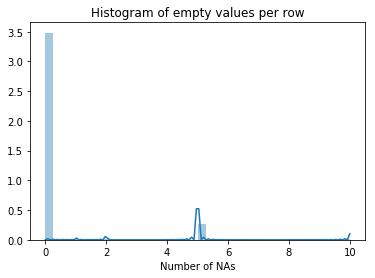

In [109]:
sns.distplot(houseprice_df2.isnull().sum(axis=1))
plt.title('Histogram of empty values per row')
plt.xlabel('Number of NAs')
plt.show()

In [58]:
# drop rows with more than 2 missing values

houseprice_df3 = houseprice_df2.loc[houseprice_df2.isnull().sum(axis=1) < 3 ,:]
print('{} out of {} rows dropped'.format(houseprice_df2.shape[0] - houseprice_df3.shape[0], houseprice_df2.shape[0]))

111 out of 1460 rows dropped


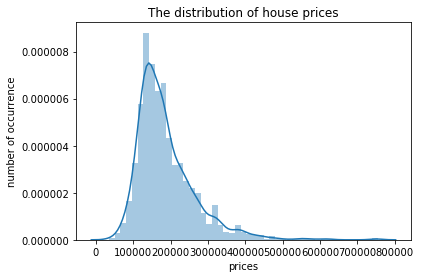

In [30]:
# Distribution of target feature
sns.distplot(houseprice_df3.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("prices")
plt.ylabel("number of occurrence")
plt.show()

In [227]:
# correaltion matrix for the 10 most correlated features
corr = houseprice_df3.corr()
corr_features = np.abs(corr['saleprice']).sort_values(ascending=False).index[:11]
corr = houseprice_df[corr_features[1:]].corr()
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(np.abs(corr.shape)), k=1).astype(np.bool)) 
# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
# remove features that have high correlation
corr = corr.drop(to_drop, axis=1).drop(to_drop, axis=0)
to_keep = corr.columns.values.tolist()
to_keep.append('saleprice')
corr = houseprice_df3[to_keep].corr()
corr.style.background_gradient(cmap='RdBu_r')

,overallqual,grlivarea,garagecars,firstflrsf,fullbath,yearbuilt,yearremodadd,saleprice
overallqual,1,0.59253,0.593238,0.481512,0.577596,0.571045,0.549813,0.784687
grlivarea,0.59253,1,0.483413,0.554574,0.626696,0.188489,0.275289,0.709752
garagecars,0.593238,0.483413,1,0.44023,0.511789,0.524512,0.460279,0.641556
firstflrsf,0.481512,0.554574,0.44023,1,0.369543,0.259604,0.238418,0.603725
fullbath,0.577596,0.626696,0.511789,0.369543,1,0.485807,0.459228,0.566923
yearbuilt,0.571045,0.188489,0.524512,0.259604,0.485807,1,0.620046,0.504003
yearremodadd,0.549813,0.275289,0.460279,0.238418,0.459228,0.620046,1,0.501054
saleprice,0.784687,0.709752,0.641556,0.603725,0.566923,0.504003,0.501054,1


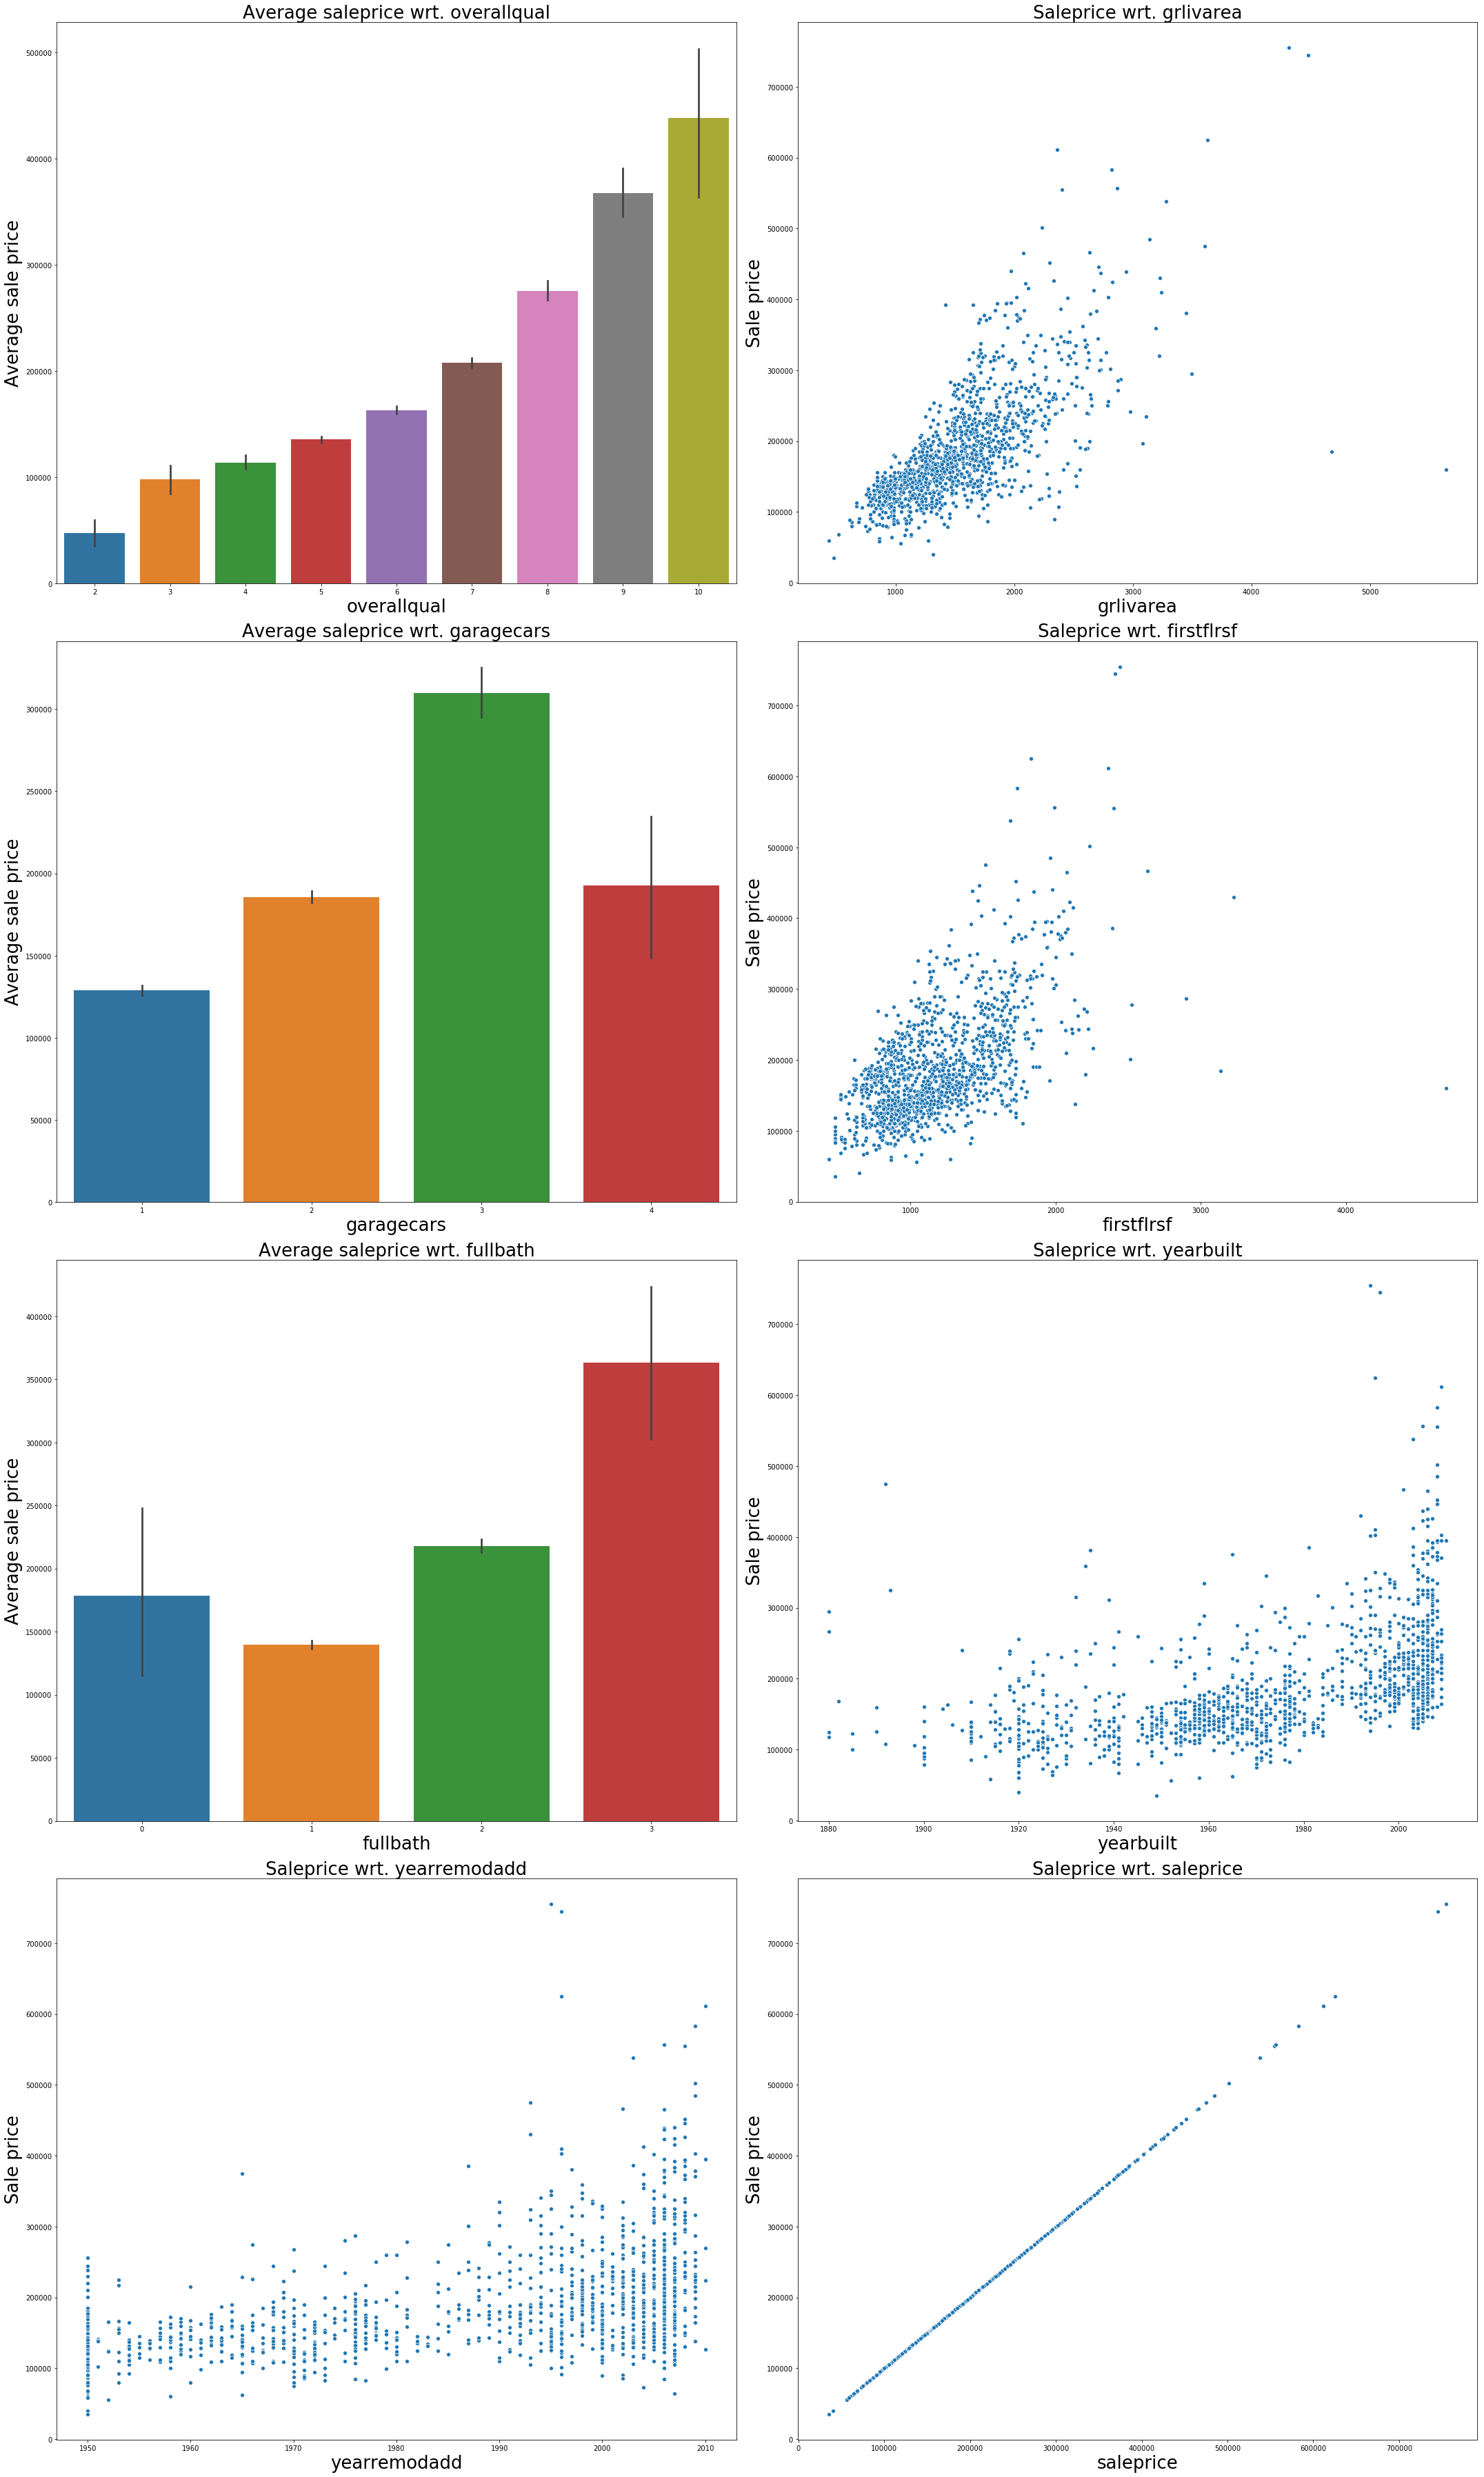

In [238]:
# visualize differences in sale price among the different features of interest
plt.figure(figsize=(30,50))

for index, column in enumerate(to_keep):
    plt.subplot(4,2,index+1)
    if(houseprice_df3[column].nunique() < 10):
        sns.barplot(x=column, y='saleprice', data=houseprice_df3)
        plt.title('Average saleprice wrt. {}'.format(column), size=26)
        plt.ylabel('Average sale price', size=26)
        plt.xlabel(column, size=26)
    else:
        sns.scatterplot(x=column, y='saleprice', data=houseprice_df3)
        plt.title('Saleprice wrt. {}'.format(column), size=26)
        plt.ylabel('Sale price', size=26)
        plt.xlabel(column, size=26)

plt.tight_layout()

plt.show()

# change this text
As can be seen in the graph, the average sale price seem to be different between each group. That is to say, on average, houses with more above ground rooms and better overall quality tend to sell for more.

## An initial model for house sale prices

Simple linear regression model and estimate it using OLS. Will use both scikit-learn and statsmodels for the sake of practice.

In [261]:
#SciKit Learn Model

target = houseprice_df3['saleprice']
data = houseprice_df3[to_keep[:-1]]

# Initialize linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(data, target)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 21576.34001153     52.96854906  16966.07961158     32.20423775
 -10908.42517197    298.72731956    277.2473634 ]

Intercept: 
 -1221267.0772255561


Estimated model:

$$ sale price = -1221267.08 + 21576.34*overallqual + 52.97*grlivarea +  16966.08*garagecars + 32.20*firstflrsf + -10908.41*fullbath + 298.73*yearbuilt + 277.25*yearremodadd\qquad$$

In [262]:
# StatsModels model

sm_data = sm.add_constant(data)

results = sm.OLS(target, sm_data).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     617.9
Date:                Thu, 15 Aug 2019   Prob (F-statistic):               0.00
Time:                        00:54:56   Log-Likelihood:                -16155.
No. Observations:                1349   AIC:                         3.233e+04
Df Residuals:                    1341   BIC:                         3.237e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.221e+06   1.38e+05     -8.862      0.000   -1.49e+06   -9.51e+05
overallqual   2.158e+04   1272.381     16.957      0.000    1.91e+04    2.41e+04
grlivarea       52.9685      3.267     16.211      0.000      46.559      59.378
garagecars    1.697e+04   2276.687      7.452      0.000    1.25e+04    2.14e+04
firstflrsf      32.2042      3.397      9.481      0.000      25.541      38.868
fullbath     -1.091e+04   2846.004     -3.833      0.000   -1.65e+04   -5325.320
yearbuilt      298.7273     53.722      5.561      0.000     193.338     404.116
yearremodadd   277.2474     70.053      3.958      0.000     139.822     414.673
==============================================================================
Omnibus:                      392.557   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37674.806
Skew:                          -0.218   Prob(JB):                         0.00
Kurtosis:                      28.886   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

### Assumption one: linearity of the model in its coefficients
Satisfied by design

### Assumption two: the error term should be zero on average

In [269]:
predictions = lrm.predict(data)
errors = target - predictions
print("Mean of the errors in model is: {:.2}".format(np.mean(errors)))

Mean of the errors in model is: -1e-10


The average of the model's error is effectively zero.

### Assumption three: homoscedasticity

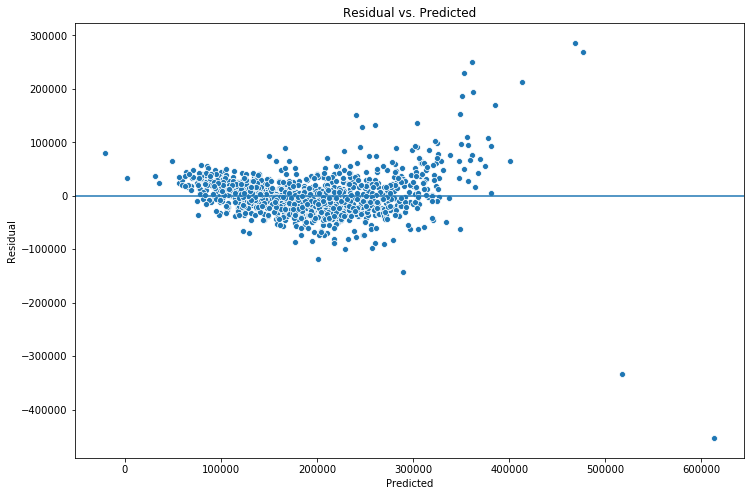

In [273]:
# visualizing homoscedasticity
plt.figure(figsize=(12,8))
sns.scatterplot(x=predictions, y=errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [274]:
# statistical tests for homoscedasticity
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 437.723 and p value is 3.39e-97
Levene test statistic value is 448.642 and p value is 3.11e-92


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.
This could be due to ouliers in the data or lack of normality.

### Assumption four: low multicollinearity

In [280]:
corr = houseprice_df3[to_keep].corr()
corr.style.background_gradient(cmap='RdBu_r')

,overallqual,grlivarea,garagecars,firstflrsf,fullbath,yearbuilt,yearremodadd,saleprice
overallqual,1,0.59253,0.593238,0.481512,0.577596,0.571045,0.549813,0.784687
grlivarea,0.59253,1,0.483413,0.554574,0.626696,0.188489,0.275289,0.709752
garagecars,0.593238,0.483413,1,0.44023,0.511789,0.524512,0.460279,0.641556
firstflrsf,0.481512,0.554574,0.44023,1,0.369543,0.259604,0.238418,0.603725
fullbath,0.577596,0.626696,0.511789,0.369543,1,0.485807,0.459228,0.566923
yearbuilt,0.571045,0.188489,0.524512,0.259604,0.485807,1,0.620046,0.504003
yearremodadd,0.549813,0.275289,0.460279,0.238418,0.459228,0.620046,1,0.501054
saleprice,0.784687,0.709752,0.641556,0.603725,0.566923,0.504003,0.501054,1


Highly correlated features were dropped during model preperation. Therefore, this assumption is satisfied.

### Assumption five: error terms should be uncorrelated with one another

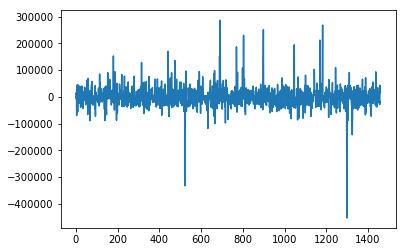

In [282]:
plt.plot(errors)
plt.show()

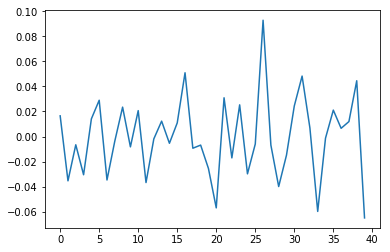

In [283]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

So, the autocorrelation between the errors of the model is indeed  low (ranging between -0.06 and 0.10).

### Assumption six: features shouldn't be correlated with the errors